In [50]:
#Importing Libraries
import numpy as np 
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle as pkl

### Importing the data 
The data is imported and loaded using pandas and numpy methods below

In [51]:
#Importing data 
df = pd.read_csv("datafiles/Data.csv")

In [52]:
df.shape

(300, 4)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Source       300 non-null    object 
 1   Destination  300 non-null    object 
 2   Distance     298 non-null    float64
 3   Cost         298 non-null    float64
dtypes: float64(2), object(2)
memory usage: 9.5+ KB


In [54]:
df.isnull().sum()

Source         0
Destination    0
Distance       2
Cost           2
dtype: int64

In [55]:
df.dropna(inplace=True)
df.shape

(298, 4)

In [56]:
df.describe()

,Distance,Cost
count,298.000000,298.000000
mean,1519.942275,161585.063273
std,801.455704,85202.755845
min,12.586000,1338.017660
25%,823.216500,87516.146115
50%,1515.823500,161147.196285
75%,2081.730000,221308.716300
max,3797.237000,403684.265470


In [65]:
df[50:80]

,Source,Destination,Distance,Cost
50,Shimla,Kolkata,1883.799,200266.67169
51,Pauri Garhwal,Araria,1360.924,144679.83044
52,Mahbubnagar,Akola,562.661,59816.49091
53,Budaun,Aurangabad,789.723,83955.45213
54,Satara,Durg,1004.329,106770.21599
55,Koppal,Jamui,2097.491,222984.26821
56,Washim,Dohad,600.611,63850.95541
57,Nilgiris,Lakhisarai,2473.672,262976.07032
58,Kannauj,Daman,1328.907,141276.10317
59,Kannauj,Kanpur Nagar,99.556,10583.79836


In [13]:
df['Distance'].to_numpy()

array([1939.572, 2538.667, 2050.261, 1972.095, 2071.325, 2073.579,
       1817.569, 1173.004, 1266.164,  879.889,  808.683,  634.089,
        182.947,  712.577,  528.906, 1362.004, 2930.392, 2550.425,
       1122.332, 1619.205, 1560.472,  320.12 ,  934.563,  378.314,
        829.417, 2982.978, 2129.345, 1562.242, 2179.764, 1527.   ,
        679.228,  229.405, 1324.852,  515.569,  991.2  ,  437.615,
        451.3  , 1501.329,  800.899, 1797.791, 2991.617,  451.431,
        992.91 , 1541.723,  520.543,  689.211, 2319.975,  583.901,
       1128.43 , 1198.325, 1883.799, 1360.924,  562.661,  789.723,
       1004.329, 2097.491,  600.611, 2473.672, 1328.907,   99.556,
        769.252, 1106.275, 1719.847,  405.456, 2718.396,  740.359,
       1377.835,  757.106,  825.975, 2021.566, 2903.793, 1886.149,
        270.054, 2527.012, 1078.574, 1993.392, 1593.736, 1976.467,
       1292.84 , 2525.033, 1658.911, 1928.024, 1398.782, 2645.623,
       1087.507, 1665.504, 2178.786, 1569.364, 1092.415, 1387.

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df['Distance'],df['Cost'],train_size=0.75)

In [21]:
# X_train, X_test = X_train.to_numpy(),X_test.to_numpy()
# y_train,y_test = y_train.to_numpy(),y_test.to_numpy()


## Normalize/Scale the Data

In [25]:
#### This cell has been added at the end as to emphasize the importance of Normalisiing the data ######
#Before Fitting to the model , we need to reshape the data
X_train_shape = X_train.reshape((-1,1))

#Calculating mean and standard deviation for single data points
mean,sigma = np.mean(X_train),np.std(X_train)
#Normalise the data 
scale = StandardScaler()
X_train_norm = scale.fit_transform(X_train_shape)
X_train_norm.shape
# X_train_shape


1516.83235426009

## Apply the gradient Descent 
SGDRegressor is used to apply the gradient descent

In [26]:

#Training our model by fitting to the linear model
gradient_descent = SGDRegressor(max_iter=1000)
gradient_descent.fit(X_train_norm,y_train)

SGDRegressor()

In [27]:
#Extracting weights and bias from gradient Descent 
w_norm = gradient_descent.coef_
b_norm = gradient_descent.intercept_
print(f"The weights and the bias would be w : {w_norm} and b : {b_norm} respectively")

The weights and the bias would be w : [83941.55301447] and b : [161254.42348607] respectively


## Predict the data

In [28]:
#Predicting the data 
y_pred = gradient_descent.predict(X_train_norm)


### Measuring Accuracy for Training Data

In [29]:
#Measuring the accuracy 
# model evaluation for training set

mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for training set
--------------------------------------
MAE is 6.964206374736161
MSE is 70.3215338771377
R2 score is 0.9999999900219065
Accuracy : 99.999999%


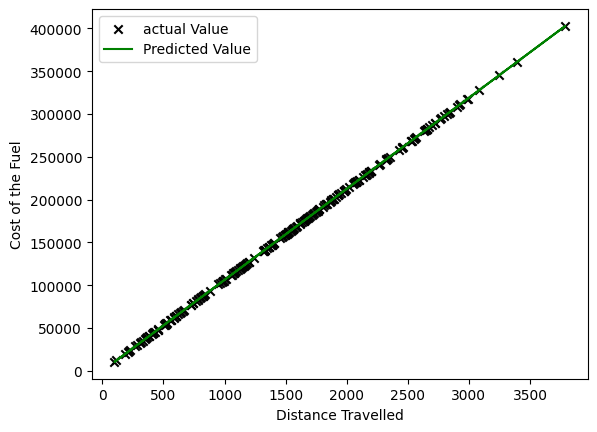

In [30]:
# print(X_train,y_train,y_pred,sep=" ")
plt.scatter(X_train,y_train,marker='x',c='black',label='actual Value')
plt.plot(X_train,y_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

In [31]:
#Predicting for a new value
X_test_new = X_test.reshape((-1,1))
# X_test_norm = scale.fit(X_test_new)
X_test_norm = scale.transform(X_test_new)
# print(X_test_norm[:10])

### Computating Z_Score normalisation instead of scale.transform() for better accuracy #####

# X_test_norm = (X_test_new - mean) / sigma
# print(X_test_new)
y_test_pred = gradient_descent.predict(X_test_norm)

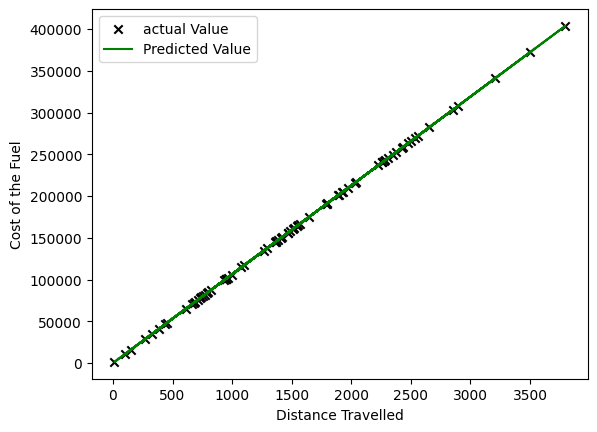

In [32]:
# print(X_test,y_test,y_pred,sep=" ")
plt.scatter(X_test,y_test,marker='x',c='black',label='actual Value')
plt.plot(X_test,y_test_pred,color='green',label='Predicted Value')
plt.xlabel("Distance Travelled"); 
plt.ylabel("Cost of the Fuel"); 
plt.legend(); 
plt.show()

### Measuring the accuracy for testing Data

In [33]:
# model evaluation for testing set

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

print(f"Accuracy : {r2 * 100:.6f}%")

The model performance for testing set
--------------------------------------
MAE is 7.224513322414805
MSE is 77.76805376673134
R2 score is 0.9999999900188928
Accuracy : 99.999999%


In [86]:
#Save And Load the model

modelName = "fuel_model.pkl"
pkl.dump(gradient_descent,open("datafiles/" + modelName,'wb'))

scalerName = "scale.pkl"
pkl.dump(scale,open("datafiles/" + scalerName,'wb'))

In [90]:
model = pkl.load(open("datafiles/" + modelName,'rb'))
scale = pkl.load(open("datafiles/" + scalerName,'rb'))
# model.predict(scale.transform([[1]]))
# model.predict([[]])
# model.predict(scale.transform(np.array(250).reshape(1,-1)))

array([26590.92878429])